In [253]:
from keras.models import Model, Input

In [254]:
from keras.utils import to_categorical, np_utils
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import (Dense, Reshape, Activation,
                          LSTM, Convolution2D, Flatten, 
                          MaxPooling1D, MaxPooling2D, Dropout, Bidirectional, BatchNormalization, GlobalAveragePooling2D)
from keras.optimizers import Adam
import pandas as pd
import numpy as np
import pickle

In [255]:
import os

In [256]:
def convert_format(file):
    base_to_value = {65 : 49, 71 : 50 , 67 : 51 , 84 : 52}
    with open(file, 'rb') as read_file:
        seqs = pickle.load(read_file)
    seqs = list(map(lambda x: [[int(i.upper().translate(base_to_value)) for i in x[0]],
                                  [int(i.upper().translate(base_to_value)) for i in x[1]]], seqs ))
    seqs = to_categorical(seqs)
    return seqs
    

In [257]:
os.chdir('/Users/beth/Desktop/MetisProject5data/')

In [258]:
normal_bladder = convert_format("normal_bladder.pickle")
normal_breast = convert_format("normal_breast.pickle")
normal_colorectal = convert_format("normal_colorectal.pickle")
normal_glioblastoma = convert_format("normal_glioblastoma.pickle")
normal_glioma = convert_format("normal_glioma.pickle")
normal_lung = convert_format("normal_lung.pickle")
normal_pancreatic = convert_format("normal_pancreatic.pickle")
normal_prostate = convert_format("normal_prostate.pickle")
normal_renal = convert_format("normal_renal.pickle")
normal_skin = convert_format("normal_skin.pickle")
normal_stomach = convert_format("normal_stomach.pickle")
normal_uterine = convert_format("normal_uterine.pickle")
normal_liver = convert_format("normal_liver.pickle")

In [259]:
tumor_bladder = convert_format("tumor_bladder.pickle")
tumor_breast = convert_format("tumor_breast.pickle")
tumor_colorectal = convert_format("tumor_colorectal.pickle")
tumor_glioblastoma = convert_format("tumor_glioblastoma.pickle")
tumor_glioma = convert_format("tumor_glioma.pickle")
tumor_lung = convert_format("tumor_lung.pickle")
tumor_pancreatic = convert_format("tumor_pancreatic.pickle")
tumor_prostate = convert_format("tumor_prostate.pickle")
tumor_renal = convert_format("tumor_renal.pickle")
tumor_skin = convert_format("tumor_skin.pickle")
tumor_stomach = convert_format("tumor_stomach.pickle")
tumor_uterine = convert_format("tumor_uterine.pickle")
tumor_liver = convert_format("tumor_liver.pickle")

In [260]:
normal_glio = np.concatenate([normal_glioma,normal_glioblastoma],axis=0)
tumor_glio = np.concatenate([tumor_glioma,tumor_glioblastoma],axis=0)

In [261]:
del normal_glioma,normal_glioblastoma,tumor_glioma,tumor_glioblastoma

In [262]:
np.random.seed(11)

In [263]:
def train_test_split(array):
    indices=np.random.randint(array.shape[0], size=2000)
    test = array[indices]
    train = array[[i for i in range(array.shape[0]) if not i in indices]]
    return test, train

In [264]:
bladder_test, bladder_train = train_test_split(tumor_bladder)
del tumor_bladder
breast_test, breast_train = train_test_split(tumor_breast)
del tumor_breast
colorectal_test, colorectal_train = train_test_split(tumor_colorectal)
del tumor_colorectal

In [265]:
glio_test, glio_train = train_test_split(tumor_glio)
del tumor_glio
lung_test, lung_train = train_test_split(tumor_lung)
del tumor_lung
pancreatic_test, pancreatic_train = train_test_split(tumor_pancreatic)
del tumor_pancreatic

In [266]:
renal_test, renal_train = train_test_split(tumor_renal)
del tumor_renal
prostate_test, prostate_train = train_test_split(tumor_prostate)
del tumor_prostate
skin_test, skin_train = train_test_split(tumor_skin)
del tumor_skin
stomach_test, stomach_train = train_test_split(tumor_stomach)
del tumor_stomach
uterine_test, uterine_train = train_test_split(tumor_uterine)
del tumor_uterine
liver_test, liver_train = train_test_split(tumor_liver)
del tumor_liver

In [267]:
bladder_test_normal, bladder_train_normal = train_test_split(normal_bladder)
del normal_bladder
breast_test_normal, breast_train_normal = train_test_split(normal_breast)
del normal_breast
colorectal_test_normal, colorectal_train_normal = train_test_split(normal_colorectal)
del normal_colorectal
glio_test_normal, glio_train_normal = train_test_split(normal_glio)
del normal_glio
lung_test_normal, lung_train_normal = train_test_split(normal_lung)
del normal_lung
pancreatic_test_normal, pancreatic_train_normal = train_test_split(normal_pancreatic)
del normal_pancreatic
renal_test_normal, renal_train_normal = train_test_split(normal_renal)
del normal_renal
prostate_test_normal, prostate_train_normal = train_test_split(normal_prostate)
del normal_prostate
skin_test_normal, skin_train_normal = train_test_split(normal_skin)
del normal_skin
stomach_test_normal, stomach_train_normal = train_test_split(normal_stomach)
del normal_stomach
uterine_test_normal, uterine_train_normal = train_test_split(normal_uterine)
del normal_uterine
liver_test_normal, liver_train_normal = train_test_split(normal_liver)
del normal_liver

In [268]:
y_train_tumor = [1]*bladder_train.shape[0]+[2]*breast_train.shape[0]+[3]*colorectal_train.shape[0]+[4]*glio_train.shape[0]+[5]*lung_train.shape[0]\
+[6]*pancreatic_train.shape[0]+[7]*renal_train.shape[0]+[8]*prostate_train.shape[0]+[9]*skin_train.shape[0]+[10]*stomach_train.shape[0]\
+[11]*uterine_train.shape[0]+[12]*liver_train.shape[0]

In [269]:
len(y_train_tumor)

2231490

In [270]:
tumor = np.concatenate([bladder_train,breast_train,colorectal_train],axis=0)

In [271]:
tumor = np.concatenate([tumor,glio_train],axis=0)

In [272]:
del bladder_train, breast_train, colorectal_train, glio_train

In [273]:
tumor = np.concatenate([tumor,lung_train,pancreatic_train,renal_train],axis=0)

In [274]:
del lung_train, pancreatic_train, renal_train

In [275]:
tumor = np.concatenate([tumor,prostate_train,skin_train,stomach_train],axis=0)

In [276]:
del prostate_train,skin_train,stomach_train

In [277]:
tumor = np.concatenate([tumor,uterine_train],axis=0)

In [278]:
del uterine_train

In [279]:
tumor = np.concatenate([tumor,liver_train],axis=0)
del liver_train

In [280]:
tumor.shape

(2231490, 2, 100, 5)

In [281]:
from collections import defaultdict

In [282]:
class_weights = defaultdict(int)
for i in range(1,13):
    class_weights[i]=y_train_tumor.count(i)

In [283]:
class_weights

defaultdict(int,
            {1: 107145,
             2: 114558,
             3: 207706,
             4: 116236,
             5: 196181,
             6: 27982,
             7: 24693,
             8: 27325,
             9: 324160,
             10: 150133,
             11: 883308,
             12: 52063})

In [284]:
y_train_normal = [0]*(bladder_train_normal.shape[0]+breast_train_normal.shape[0]+colorectal_train_normal.shape[0]+glio_train_normal.shape[0]+lung_train_normal.shape[0]\
+pancreatic_train_normal.shape[0]+renal_train_normal.shape[0]+prostate_train_normal.shape[0]+skin_train_normal.shape[0]+stomach_train_normal.shape[0]+uterine_train_normal.shape[0]+liver_train_normal.shape[0])


In [285]:
len(y_train_normal)

2232877

In [286]:
normal = np.concatenate([bladder_train_normal,breast_train_normal,colorectal_train_normal],axis=0)

In [287]:
normal = np.concatenate([normal,glio_train_normal],axis=0)

In [288]:
del bladder_train_normal, breast_train_normal, colorectal_train_normal, glio_train_normal

In [289]:
normal = np.concatenate([normal,lung_train_normal,pancreatic_train_normal,renal_train_normal],axis=0)

In [290]:
del lung_train_normal, pancreatic_train_normal, renal_train_normal

In [291]:
normal = np.concatenate([normal,prostate_train_normal,skin_train_normal,stomach_train_normal],axis=0)

In [292]:
del prostate_train_normal,skin_train_normal,stomach_train_normal

In [293]:
normal = np.concatenate([normal,uterine_train_normal, liver_train_normal],axis=0)
del uterine_train_normal, liver_train_normal

In [294]:
normal.shape[0]

2232877

In [295]:
class_weights[0]=normal.shape[0]

In [296]:
class_weights

defaultdict(int,
            {1: 107145,
             2: 114558,
             3: 207706,
             4: 116236,
             5: 196181,
             6: 27982,
             7: 24693,
             8: 27325,
             9: 324160,
             10: 150133,
             11: 883308,
             12: 52063,
             0: 2232877})

In [297]:
for key in class_weights.keys():
    class_weights[key]=class_weights[0]/class_weights[key]

In [298]:
class_weights

defaultdict(int,
            {1: 20.839768537962573,
             2: 19.491235880514672,
             3: 10.750180543653048,
             4: 19.209857531229567,
             5: 11.381718922831467,
             6: 79.79690515331285,
             7: 90.42550520390394,
             8: 81.71553522415371,
             9: 6.888194101678184,
             10: 14.872659575176677,
             11: 2.5278577800721833,
             12: 42.887981868121315,
             0: 1.0})

In [299]:
y_train = y_train_tumor + y_train_normal

In [300]:
len(y_train)

4464367

In [301]:
X_train = np.concatenate([tumor,normal],axis=0)
del tumor,normal

In [302]:
X_train.shape

(4464367, 2, 100, 5)

In [303]:
y_train = to_categorical(y_train)

In [304]:
del train_test_split
from sklearn.model_selection import train_test_split

In [305]:
X_train.shape

(4464367, 2, 100, 5)

In [306]:
y_train.shape

(4464367, 13)

In [307]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=11, stratify=y_train)

In [3]:
model=Sequential()

model.add(Convolution2D(input_shape=(2,100,5),
                       filters=64,
                       kernel_size=(2,3),
                       padding="same",
                       activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=2,
                       padding="same"))

model.add(Convolution2D(filters=33,
                       kernel_size=(2,2),
                       padding="same",
                       activation="relu"))
model.add(MaxPooling2D(pool_size=2,
                       padding="same"))
model.add(BatchNormalization(axis=-1))

model.add(GlobalAveragePooling2D())

model.add(Dense(units=13))
model.add(Activation('softmax'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 2, 100, 64)        1984      
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 100, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 50, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 50, 33)         8481      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 25, 33)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 25, 33)         132       
_________________________________________________________________
global_average_pooling2d_1 ( (None, 33)               

In [62]:
callback = EarlyStopping(monitor='val_loss', patience=4)

In [66]:
optimizer = Adam(lr=0.1)

In [67]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_crossentropy','accuracy'])

In [68]:
model.fit(X_train, y_train, epochs=100, batch_size=10000,
              validation_data=(X_val, y_val),verbose=True, callbacks=[callback], class_weight=class_weights)

Train on 4017930 samples, validate on 446437 samples
Epoch 1/100
4017930/4017930 [==============================] - 1419s 353us/step - loss: 16.0676 - categorical_crossentropy: 2.3296 - accuracy: 0.3783 - val_loss: 2.1345 - val_categorical_crossentropy: 2.1345 - val_accuracy: 0.4975
Epoch 2/100
4017930/4017930 [==============================] - 1314s 327us/step - loss: 15.0229 - categorical_crossentropy: 1.9377 - accuracy: 0.5295 - val_loss: 1.5833 - val_categorical_crossentropy: 1.5833 - val_accuracy: 0.5461
Epoch 3/100
4017930/4017930 [==============================] - 1266s 315us/step - loss: 14.7121 - categorical_crossentropy: 1.8089 - accuracy: 0.5240 - val_loss: 2.3026 - val_categorical_crossentropy: 2.3026 - val_accuracy: 0.4837
Epoch 4/100
4017930/4017930 [==============================] - 1306s 325us/step - loss: 14.5941 - categorical_crossentropy: 1.7521 - accuracy: 0.5204 - val_loss: 1.6340 - val_categorical_crossentropy: 1.6340 - val_accuracy: 0.5313
Epoch 5/100
4017930/401

In [69]:
model_json = model.to_json()
with open("model_with_liver.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_with_liver.h5")

In [70]:
predictions = model.predict(X_val)

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
predictions_01 = np.argmax(predictions,axis=1) #predvec from below

In [73]:
pd.Series(predictions_01).value_counts()

0     188468
9      52843
7      41757
11     38027
5      29124
8      26480
6      17330
4      12418
10     11911
1      10831
12     10399
2       5999
3        850
dtype: int64

In [74]:
pd.Series(np.argmax(y_val,axis=1)).value_counts()

0     223288
11     88331
9      32416
3      20771
5      19618
10     15013
4      11624
2      11456
1      10715
12      5206
6       2798
8       2732
7       2469
dtype: int64

In [75]:
y_val_01= np.argmax(y_val,axis=1)

In [76]:
confusion = confusion_matrix(y_val_01,predictions_01)

In [77]:
import seaborn as sns

In [78]:
confusion_sum=confusion.sum(axis=1)

In [79]:
confusion_sum

array([223288,  10715,  11456,  20771,  11624,  19618,   2798,   2469,
         2732,  32416,  15013,  88331,   5206])

In [99]:
confusion2=[]
for i in range(0,13):
    confusion2.append(confusion[i]/confusion_sum[i])

In [100]:
confusion2

[array([7.95886926e-01, 6.50729103e-03, 4.43373580e-03, 3.98588370e-04,
        1.19666081e-02, 2.05474544e-02, 1.13261796e-02, 5.07819498e-02,
        2.74578123e-02, 3.20841245e-02, 8.97047759e-03, 1.68974598e-02,
        1.27413923e-02]),
 array([0.04638357, 0.26010266, 0.07447503, 0.00093327, 0.02491834,
        0.1029398 , 0.02911806, 0.1125525 , 0.03938404, 0.19934671,
        0.01717219, 0.06140924, 0.03126458]),
 array([0.03605098, 0.14568785, 0.05857193, 0.00165852, 0.03578911,
        0.11496159, 0.04085196, 0.16803422, 0.06808659, 0.17589036,
        0.02950419, 0.09523394, 0.02967877]),
 array([0.05565452, 0.0145395 , 0.01410621, 0.0064513 , 0.05228444,
        0.09022194, 0.07799336, 0.14929469, 0.14322854, 0.10957585,
        0.08767031, 0.16556738, 0.03341197]),
 array([0.04748796, 0.02245354, 0.01746387, 0.00206469, 0.06374742,
        0.10770819, 0.07467309, 0.17988644, 0.13618376, 0.14341019,
        0.03226084, 0.13282863, 0.03983138]),
 array([0.03981038, 0.06626567

In [151]:
import matplotlib.pyplot as plt

In [ ]:
y_train_tumor = [1]*bladder_train.shape[0]+[2]*breast_train.shape[0]+[3]*colorectal_train.shape[0]+[4]*glio_train.shape[0]+[5]*lung_train.shape[0]\
+[6]*pancreatic_train.shape[0]+[7]*renal_train.shape[0]+[8]*prostate_train.shape[0]+[9]*skin_train.shape[0]+[10]*stomach_train.shape[0]\
+[11]*uterine_train.shape[0]

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

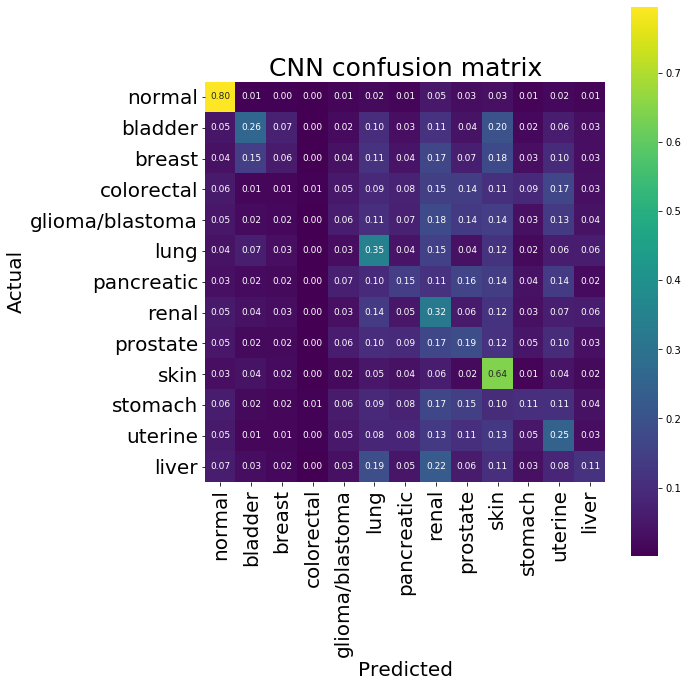

In [418]:
plt.figure(figsize=(10,10))

sns.heatmap(confusion2,square=True,cmap="plasma",annot=True,annot_kws={'size':9},xticklabels=['normal','bladder','breast','colorectal',\
                                               'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver'],
           yticklabels=['normal','bladder','breast','colorectal',\
                                               'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver'],fmt='.2f')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.title('CNN confusion matrix', fontsize=25)
plt.tight_layout()
#plt.savefig('model_liver_plasma.jpg');

In [106]:
confusion[0,0]/sum(confusion[0])

0.7958869263014582

In [108]:
confusion[0,0]/sum(confusion[:,0])

0.9429293036483647

In [115]:
def print_stats(confusion_matrix):
    for i, v in enumerate(['normal','bladder','breast','colorectal',\
                        'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver']):
        recall = confusion[i,i]/sum(confusion[i])
        percision = confusion[i,i]/sum(confusion[:,i])
        print("{} recall: {}".format(v,recall))
        print("{} percision: {}".format(v,percision))
        print("\n")

In [116]:
print_stats(confusion)

normal recall: 0.7958869263014582
normal percision: 0.9429293036483647


bladder recall: 0.2601026598226785
bladder percision: 0.2573169605761241


breast recall: 0.058571927374301676
breast percision: 0.11185197532922153


colorectal recall: 0.006451302296471041
colorectal percision: 0.15764705882352942


glioma/blastoma recall: 0.06374741913282864
glioma/blastoma percision: 0.05967144467708166


lung recall: 0.34555000509735956
lung percision: 0.23276335668177447


pancreatic recall: 0.1461758398856326
pancreatic percision: 0.02360069244085401


renal recall: 0.32118266504657755
renal percision: 0.018990827885145004


prostate recall: 0.18521229868228403
prostate percision: 0.019108761329305137


skin recall: 0.6448358835143139
skin percision: 0.3955680033306209


stomach recall: 0.10657430227136482
stomach percision: 0.13432961128368734


uterine recall: 0.24913110912363723
uterine percision: 0.5786940857811554


liver recall: 0.11294660007683442
liver percision: 0.05654389845177421

In [129]:
correct_normal = predictions[(predictions_01 == y_val_01) & y_val_01 == 0]

In [130]:
len(correct_normal)

393035

In [131]:
correct_normal[0:3]

array([[8.8664287e-01, 9.1955708e-03, 9.6200760e-03, 8.7237079e-03,
        9.2436438e-03, 7.4455505e-03, 8.0240238e-03, 1.0964251e-02,
        8.2780980e-03, 8.3368123e-03, 1.1613730e-02, 9.3163028e-03,
        1.2595422e-02],
       [6.2814124e-02, 4.3933384e-02, 6.9693021e-02, 7.9794630e-02,
        9.5178224e-02, 4.8075523e-02, 1.0341516e-01, 7.6857656e-02,
        1.1068599e-01, 6.3867167e-02, 9.9682793e-02, 8.4132850e-02,
        6.1869543e-02],
       [5.3284835e-04, 9.2533953e-02, 8.9896083e-02, 4.3150213e-02,
        7.4814975e-02, 9.5557898e-02, 4.2263035e-02, 1.7663863e-01,
        7.4348010e-02, 2.6809558e-02, 7.7368818e-02, 2.6389716e-02,
        1.7969628e-01]], dtype=float32)

In [ ]:
predictions[]

In [135]:
model.layers[-2]

In [385]:
amp_layer_weights = model.layers[-2].get_weights()[0]

In [331]:
model.layers[-4]

In [332]:
model_for_heatmaps = Model(inputs=model.input, 
        outputs=(model.layers[-4].output, model.layers[-1].output)) 

In [386]:
last_conv_output, predictions = model_for_heatmaps.predict(X_val)

In [390]:
last_conv_output[1].shape

(1, 25, 33)

In [391]:
amp_layer_weights.shape

(33, 13)

In [151]:
most_normal = np.argsort(predictions[:,0])[-100:]

In [156]:
most_bladder = np.argsort(predictions[:,1])[-100:]

In [157]:
most_bladder[-1]

212115

In [158]:
y_val[212115]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [333]:
pred = np.argmax(predictions[212115])

IndexError: index 212115 is out of bounds for axis 0 with size 32

In [161]:
pred

1

In [162]:
amp_layer_weights.shape

(33, 13)

In [394]:
weights = amp_layer_weights[:, 13]

IndexError: index 13 is out of bounds for axis 1 with size 13

In [393]:
weights

array([ 0.8717357 ,  0.4559147 , -0.11158713, -0.13673024,  0.04709643,
        0.21513842,  0.15881915, -0.10545158,  0.35444525,  0.30481392,
        0.0217898 , -0.14345083, -0.17545684,  0.2120839 , -0.5852442 ,
       -0.14477393,  0.08514123,  0.135216  ,  0.27180123,  0.08368718,
        0.10219112,  0.08930213, -0.06652623,  0.06470226,  0.15997647,
        0.19809203, -0.137293  ,  0.0618979 , -0.01278195, -0.13224898,
       -0.02820935, -0.01527071,  0.6807332 ], dtype=float32)

In [194]:
final_output = np.dot(last_conv_output[212115], weights)

In [344]:
final_output = np.array([[-4.1214630e-01, -3.8175726e-01, -2.8545108e-01, -6.5585661e-01,
        -8.9656949e-01, -3.8894361e-01, -7.7816528e-01, -9.5128435e-01,
        -7.1127623e-01, -1.0009663e+00,  5.6693974e+01,  2.7918810e+01,
         7.3557677e+00, -3.4647799e-01, -3.7911761e-01, -5.3459811e-01,
        -1.1933854e-01,  1.1670561e+01,  4.3465195e+01, -3.3276719e-01,
        -7.0668057e-02, -2.6673737e-01, -5.4289514e-01, -5.0235122e-01,
        -5.4113507e-02]])

In [339]:
final_output = final_output[final_output>0]

In [362]:
final_output.shape

(1, 25)

In [363]:
seq.shape

(25,)

In [199]:
ref_seq = np.argmax(X_val[212115][0],axis=1)

In [352]:
final_output.shape

(1, 25)

In [367]:
seq = 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa'
seq=np.array([seq[i:i+4] for i in range(0, len(seq), 4)])
seq = seq.reshape([-1,25])

In [368]:
seq

array([['aaaa', 'aaaa', 'aaaa', 'aaaa', 'aaaa', 'aaaa', 'aaaa', 'aaaa',
        'aaaa', 'aaaa', 'aaaa', 'aaaa', 'aaaa', 'aaaa', 'aaaa', 'aaaa',
        'aaaa', 'aaaa', 'aaaa', 'aaaa', 'aaaa', 'aaaa', 'aaaa', 'aaaa',
        'aaaa']], dtype='<U4')

In [369]:
seq[final_output>0]

array(['aaaa', 'aaaa', 'aaaa', 'aaaa', 'aaaa'], dtype='<U4')

In [382]:
seqs=[]
skip=0
for i in range(len(final_output[0])):
    if i + skip > len(final_output[0])-1:
        break
    if final_output[0][i+skip] > 0:
        x = seq[0][i+skip]
        skip=0
        while final_output[0][i + 1] > 0:
            skip=skip+1
            i = i + 1
            y = seq[0][i]
            x = x + y
        seqs.append(x)

In [383]:
seqs

['aaaaaaaaaaaa', 'aaaa', 'aaaaaaaa']

In [202]:
value_to_base = {49 : 65, 50 : 71 , 51 : 67 , 52 : 84}

In [203]:
ref_seq = [''.join(ref_seq.astype('str').tolist())]

In [204]:
seq = [''.join(seq.astype('str').tolist())]

In [205]:
seq = seq[0].translate(value_to_base)

In [206]:
ref_seq = ref_seq[0].translate(value_to_base)

In [395]:
def seq_font_size(seq):
    return .1376*seq.count('A')+.1578*seq.count('T')+.126*seq.count('C')+.124*seq.count('G')

In [396]:
seq_font_size(seq)

13.581

In [404]:
def get_signatures(tumor_type,predictions,last_conv_output,amp_layer_weights,X_val):
    tumor_list = ['normal','bladder','breast','colorectal','glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver']
    i = tumor_list.index(tumor_type)
    value_to_base = {49 : 65, 50 : 71 , 51 : 67 , 52 : 84}
    top_examples = np.argsort(predictions[:,i])[-10:]
    fig, ax = plt.subplots(10,1,figsize=(17,10))
    for k,j in enumerate(top_examples):
        weights = amp_layer_weights[:, i]
        final_output = np.dot(last_conv_output[j], weights)
        ref_seq = np.argmax(X_val[j][0],axis=1)
        ref_seq = [''.join(ref_seq.astype('str').tolist())][0].translate(value_to_base)
        seq = np.argmax(X_val[j][1],axis=1)
        seq = [''.join(seq.astype('str').tolist())][0].translate(value_to_base)
        sns.heatmap(final_output.reshape([-1,25]),cbar=None,cmap="summer", ax=ax[k])
        ax[k].axis('off')
        ax[k].text(0.04,0.8,seq,fontsize=seq_font_size(seq))
        ax[k].text(0.04,0.4,ref_seq,fontsize=seq_font_size(ref_seq))
        

In [402]:
tumor_list = ['normal','bladder','breast','colorectal','glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver']
i = tumor_list.index('breast')

In [403]:
i

2

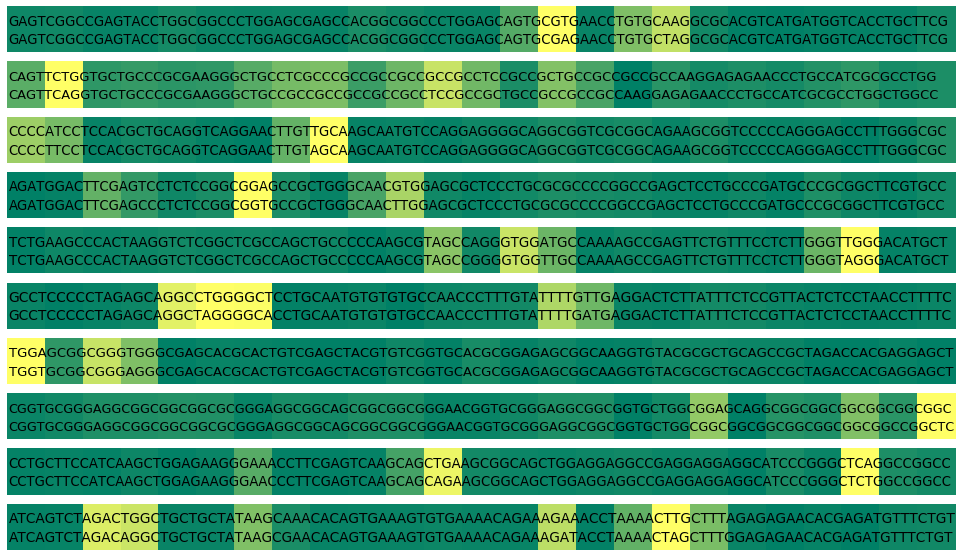

In [415]:
get_signatures('liver',predictions,last_conv_output,amp_layer_weights,X_val)

In [424]:
def get_signatures_seqs(tumor_type,predictions,last_conv_output,amp_layer_weights,X_val):
    tumor_list = ['normal','bladder','breast','colorectal','glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver']
    t = tumor_list.index(tumor_type)
    value_to_base = {49 : 65, 50 : 71 , 51 : 67 , 52 : 84}
    top_examples = np.argsort(predictions[:,t])[-5000:]
    top_seqs = []
    for k,j in enumerate(top_examples):
        weights = amp_layer_weights[:, t]
        final_output = np.dot(last_conv_output[j], weights)
        final_output = final_output
        ref_seq = np.argmax(X_val[j][0],axis=1)
        ref_seq = [''.join(ref_seq.astype('str').tolist())][0].translate(value_to_base)
        ref_seq=np.array([ref_seq[i:i+4] for i in range(0, len(ref_seq), 4)])
        ref_seq = ref_seq.reshape([-1,25])
        seq = np.argmax(X_val[j][1],axis=1)
        seq = [''.join(seq.astype('str').tolist())][0].translate(value_to_base)
        seq=np.array([seq[i:i+4] for i in range(0, len(seq), 4)])
        seq = seq.reshape([-1,25])
    
        skip=0
        for i in range(len(final_output[0])):
            if i + skip > len(final_output[0])-1:
                break
            if final_output[0][i+skip] > 0:
                importance = final_output[0][i+skip]
                x = seq[0][i+skip]
                xx = ref_seq[0][i+skip]
                
                skip=0
                if i > len(final_output[0])-2:
                        break
                while final_output[0][i + 1] > 0:
                    importance = importance + final_output[0][i+1]
                    skip=skip+1
                    i = i + 1
                    y = seq[0][i]
                    yy = ref_seq[0][i]
                    x = x + y
                    xx = xx + yy
                    
                    if i > len(final_output[0])-2:
                        break
                top_seqs.append((xx,x,importance))
    return(top_seqs)
        
        

In [425]:
test = get_signatures_seqs('bladder',predictions,last_conv_output,amp_layer_weights,X_val)

In [426]:
len(test)

20195

In [427]:
test = pd.DataFrame(test)

In [433]:
test.groupby([0,1]).aggregate({2:'mean'}).sort_values(2)

,,2
0,1,
GAGG,TCTC,0.000202
GTGCCCTG,GTGCCCTG,0.000650
AGTGAGTG,AGTGAGTG,0.006749
GGCTGCAC,GGCTGCAC,0.011214
CATG,CATG,0.012703
...,...,...
GCTCGCTCAAGGCTCGCTGC,GCTGGCTGAAGGCTCGCTGC,142.145813
TGCCTGCCTCAA,TGCCTGCCTGAA,147.011795
TCCTTCCTCAAT,TCCTTCCTGAAT,148.764954


In [423]:
from keras.layers import Add

In [431]:
input_layer = Input(shape=(2,100,5))

conv_5 = Convolution2D(filters=64,
                       kernel_size=(2,5),
                       padding="same")(input_layer)

batch_5 = BatchNormalization(axis=-1)(conv_5)

dense_5 = Dense(units=32,activation="relu")(batch_5)

dropout_5 = Dropout(0.25)(dense_5)

conv_3 = Convolution2D(filters=5,
                      kernel_size=(2,3),
                      padding="same")(dropout_5)

batch_3 = BatchNormalization(axis=-1)(conv_3)


merged = Add()([batch_3, input_layer])


conv_2 = Convolution2D(filters=32,
                       kernel_size=(2,2),
                       padding="same",
                       activation="relu")(merged)

batch_2 = BatchNormalization(axis=-1)(conv_2)

global_pool_1 = GlobalAveragePooling2D()(batch_2)

main_output = Dense(13, activation='sigmoid')(global_pool_1)

model_2 = Model(inputs=[input_layer], outputs=[main_output])

In [432]:
model_2.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 2, 100, 5)    0                                            
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 2, 100, 64)   3264        input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 2, 100, 64)   256         conv2d_17[0][0]                  
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 2, 100, 32)   2080        batch_normalization_16[0][0]     
____________________________________________________________________________________________

In [433]:
model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_crossentropy','accuracy'])

In [434]:
model_2.fit(X_train, y_train, epochs=100, batch_size=10000,
              validation_data=(X_val, y_val),verbose=True, callbacks=[callback], class_weight=class_weights)

Train on 4017930 samples, validate on 446437 samples
Epoch 1/100
4017930/4017930 [==============================] - 2023s 503us/step - loss: 16.4671 - categorical_crossentropy: 2.5121 - accuracy: 0.2786 - val_loss: 2.2105 - val_categorical_crossentropy: 2.2105 - val_accuracy: 0.4985
Epoch 2/100
4017930/4017930 [==============================] - 2096s 522us/step - loss: 15.4920 - categorical_crossentropy: 2.1211 - accuracy: 0.4964 - val_loss: 1.9711 - val_categorical_crossentropy: 1.9711 - val_accuracy: 0.5010
Epoch 3/100
4017930/4017930 [==============================] - 1905s 474us/step - loss: 14.8530 - categorical_crossentropy: 1.8324 - accuracy: 0.5072 - val_loss: 2.5033 - val_categorical_crossentropy: 2.5033 - val_accuracy: 0.4921
Epoch 4/100
4017930/4017930 [==============================] - 1827s 455us/step - loss: 14.7567 - categorical_crossentropy: 1.8074 - accuracy: 0.5126 - val_loss: 3.0562 - val_categorical_crossentropy: 3.0562 - val_accuracy: 0.0999
Epoch 5/100
2900000/401

KeyboardInterrupt: 

In [4]:
from keras.models import load_model

In [5]:
os.chdir("/Users/beth/Desktop/MetisProject5data/")

In [6]:
model.load_weights('model_with_liver.h5')

In [7]:
import pickle
import os
os.chdir('/Users/beth/Desktop')

In [111]:
with open('patient_ctDNA.pickle', 'rb') as read_file:
    patient_data = pickle.load(read_file)

In [113]:
patient_data[0]

('TGAGGCCGAGGCCGAGGCTGGGCCCGTGCAGGCCTTCGAGACGCAGGAGGCCGGGCCTGC',
 'TGAGGCCGAGGCCGAGGCTGGGCCCGTGCAGGCCTTCGAGACGCAGGAGGCCGGGCCTGA')

In [115]:
np.sum([i[0]==i[1] for i in patient_data])

31120

In [116]:
len(patient_data)

110516

In [129]:
for i in range(len(patient_data)):
    try:
        if 'n' in patient_data[i][0] or 'n' in patient_data[i][1]:
            patient_data.remove(patient_data[i])
    except:
        pass

In [130]:
for i in range(len(patient_data)):
    try:
        if 'N' in patient_data[i][0] or 'N' in patient_data[i][1]:
            patient_data.remove(patient_data[i])
    except:
        pass

In [131]:

range(len(patient_data))

range(0, 110430)

In [132]:
pd.Series(map(len,patient_data)).value_counts()

2    110430
dtype: int64

In [133]:
for i in range(len(patient_data)):
    try:
        if patient_data[i][0] > 100:
            patient_data[i][0] = patient_data[i][0][:100]
            patient_data[i][1] = patient_data[i][1][1:100]
    except:
        continue

In [134]:
base_to_value = {65 : 49, 71 : 50 , 67 : 51 , 84 : 52}
patient_data = list(map(lambda x: [[int(i.upper().translate(base_to_value)) for i in x[0]],
                                  [int(i.upper().translate(base_to_value)) for i in x[1]]], patient_data ))

#patient_data = to_categorical(patient_data)

In [135]:
from keras.preprocessing.sequence import pad_sequences

In [136]:
pd.Series(map(lambda x: len(x[0]),patient_data))

0         60
1         90
2         87
3         62
4         58
          ..
110425    58
110426    58
110427    55
110428    59
110429    88
Length: 110430, dtype: int64

In [137]:
type(patient_data)

list

In [138]:
for i in range(len(patient_data)):
    patient_data[i] =pad_sequences(
    patient_data[i], padding="pre",maxlen=100,
)

In [139]:
pd.Series(map(lambda x: len(x[0]),patient_data))

0         100
1         100
2         100
3         100
4         100
         ... 
110425    100
110426    100
110427    100
110428    100
110429    100
Length: 110430, dtype: int64

In [140]:
patient_data = to_categorical(patient_data)

In [141]:
len(patient_data)

110430

In [142]:
type(patient_data)

numpy.ndarray

In [143]:
patient_data.shape

(110430, 2, 100, 5)

In [144]:
ctDNA_predictions = model.predict(patient_data)

In [145]:
pd.Series(np.argmax(ctDNA_predictions,axis=1)).value_counts()

11    109696
1        498
5        157
3         71
9          3
2          3
6          2
dtype: int64

In [149]:
os.chdir('/Users/beth/Desktop/MetisProject5data/GENIE/')

In [225]:
def convert_from_csv(file):
    df = pd.read_csv(file,header=None)
    seqs = zip(df[2],df[1])
    seqs = list(seqs)
    seqs2 = seqs.copy()
    for i in range(len(seqs)-1):
        try:
            if 'N' in seqs[i][0].upper() or 'N' in seqs[i][1].upper():
                    seqs2.remove(seqs[i])
        except:
            seqs2.remove(seqs[i])

    base_to_value = {65 : 49, 71 : 50 , 67 : 51 , 84 : 52}
    
    seqs2 = list(map(lambda x: [[int(i.upper().translate(base_to_value)) for i in x[0]],
                                  [int(i.upper().translate(base_to_value)) for i in x[1]]], seqs2 ))
    seqs2 = to_categorical(seqs2)
    return seqs2
    

In [234]:
def plot_genie_results(dictionary_of_files, model):
    plot_results=[]
    tissues=[]
    for k, v in dictionary_of_files.items():
        seqs = convert_from_csv(v)
        predictions = model.predict(seqs)
        results = pd.Series(np.argmax(predictions,axis=1)).value_counts()
        x=np.zeros(13)
        for i in range(13):
            if i in results.index:
                x[i]=results.loc[i]/len(predictions)
            else:
                x[i]=0
        x = x.reshape([-1,13])
        plot_results.append(x)
        tissues.append(k)
        
    plot_results=np.array(plot_results)
        
    plt.figure(figsize=(10,10))

    sns.heatmap(plot_results,square=True,cmap="viridis",annot=True,annot_kws={'size':9},xticklabels=['normal','bladder','breast','colorectal',\
                                                   'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver'],
               yticklabels=[tissues],fmt='.2f')

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('Predicted', fontsize=20)
    plt.ylabel('Actual', fontsize=20)
    plt.title('GENIE validation confusion matrix', fontsize=25)
    plt.tight_layout()
    

In [237]:
dictionary_of_files={"normal":'LUAD_normal.csv',
                    'bladder':"BLCA_tumor.csv",
                    'breast':'BRCA_tumor.csv',
                    'colorectal':'COAD_tumor.csv',
                    'glio' : 'GB_tumor.csv',
                    "lung":'LUAD_tumor.csv',
                    'pancreatic':'PAAD_tumor.csv',
                    'renal':'CCRCC_tumor.csv',
                    'prostate':'PRAD_tumor.csv',
                    'skin':'SKCM_tumor.csv',
                    'stomach':'STAD_tumor.csv',
                    'uterine':'UEC_tumor.csv',
                    'liver':'LIVER_tumor.csv'}

In [238]:
plot_results=[]
tissues=[]
for k, v in dictionary_of_files.items():
    seqs = convert_from_csv(v)
    predictions = model.predict(seqs)
    results = pd.Series(np.argmax(predictions,axis=1)).value_counts()
    x=np.zeros(13)
    for i in range(13):
        if i in results.index:
            x[i]=results.loc[i]/len(predictions)
        else:
            x[i]=0
    x = x.reshape([-1,13])
    plot_results.append(x)
    tissues.append(k)

In [242]:
plot_results = np.array(plot_results)

In [243]:
plot_results.shape

(13, 1, 13)

In [244]:
plot_results = plot_results.reshape(13,13)

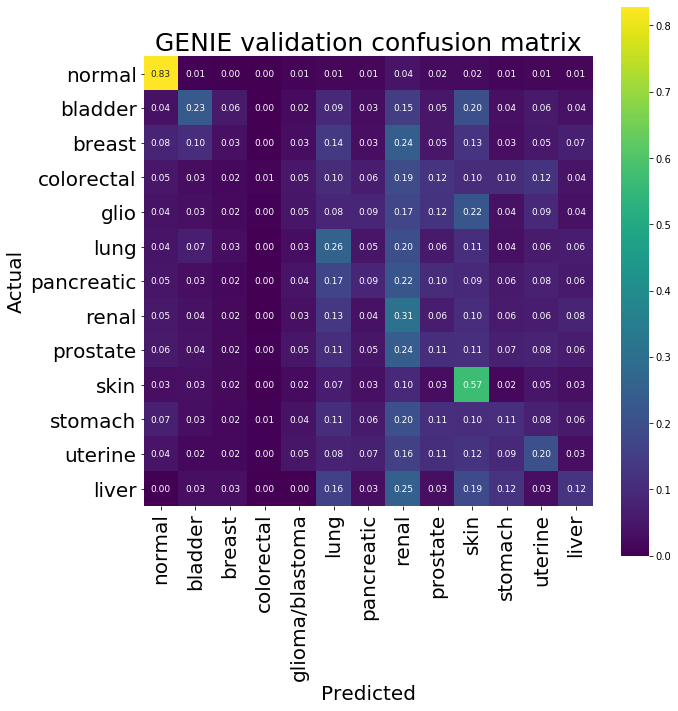

In [247]:


plt.figure(figsize=(10,10))

sns.heatmap(plot_results,square=True,cmap="viridis",annot=True,annot_kws={'size':9},xticklabels=['normal','bladder','breast','colorectal',\
                                               'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver'],
           yticklabels=tissues,fmt='.2f')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.title('GENIE validation confusion matrix', fontsize=25)
plt.tight_layout()
plt.savefig('GENIE_validation.jpg')

In [458]:
model_3=Sequential()

model_3.add(Convolution2D(input_shape=(2,100,5),
                       filters=64,
                       kernel_size=(2,3),
                       padding="same",
                       activation="relu"))
model_3.add(BatchNormalization(axis=-1))

model_3.add(GlobalAveragePooling2D())

model_3.add(Dense(units=13))
model_3.add(Activation('softmax'))

In [459]:
model_3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 2, 100, 64)        1984      
_________________________________________________________________
batch_normalization_18 (Batc (None, 2, 100, 64)        256       
_________________________________________________________________
global_average_pooling2d_10  (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 13)                845       
_________________________________________________________________
activation_8 (Activation)    (None, 13)                0         
Total params: 3,085
Trainable params: 2,957
Non-trainable params: 128
_________________________________________________________________


In [460]:
callback = EarlyStopping(monitor='val_loss', patience=4)

In [327]:
from keras.optimizers.schedules import ExponentialDecay

ModuleNotFoundError: No module named 'keras.optimizers.schedules'; 'keras.optimizers' is not a package

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

In [450]:
#optimizer = Adam(lr=0.1)

In [461]:
model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_crossentropy','accuracy'])

In [462]:
model_3.fit(X_train, y_train, epochs=100, batch_size=10000,
              validation_data=(X_val, y_val),verbose=True, callbacks=[callback], class_weight=class_weights)

Train on 4017930 samples, validate on 446437 samples
Epoch 1/100
4017930/4017930 [==============================] - 1333s 332us/step - loss: 16.4880 - categorical_crossentropy: 2.4908 - accuracy: 0.2882 - val_loss: 2.3450 - val_categorical_crossentropy: 2.3450 - val_accuracy: 0.4994
Epoch 2/100
4017930/4017930 [==============================] - 1067s 266us/step - loss: 16.1075 - categorical_crossentropy: 2.2905 - accuracy: 0.5209 - val_loss: 2.0020 - val_categorical_crossentropy: 2.0020 - val_accuracy: 0.5246
Epoch 3/100
4017930/4017930 [==============================] - 1197s 298us/step - loss: 15.7405 - categorical_crossentropy: 2.1687 - accuracy: 0.5358 - val_loss: 2.1815 - val_categorical_crossentropy: 2.1815 - val_accuracy: 0.5283
Epoch 4/100
4017930/4017930 [==============================] - 1142s 284us/step - loss: 15.5301 - categorical_crossentropy: 2.1393 - accuracy: 0.5337 - val_loss: 2.1021 - val_categorical_crossentropy: 2.1021 - val_accuracy: 0.5270
Epoch 5/100
4017930/401

In [464]:
model_json = model_3.to_json()
with open("model_one_layer.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_3.save_weights("model_one_layer.h5")

In [466]:
predictions = model_3.predict(X_val)

In [467]:
from sklearn.metrics import confusion_matrix

In [468]:
predictions_01 = np.argmax(predictions,axis=1) #predvec from below

In [469]:
pd.Series(predictions_01).value_counts()

0     220589
9      59672
11     44764
1      24963
5      23295
10     22910
6      15257
4      10994
12      8322
8       7568
7       4542
2       2295
3       1266
dtype: int64

In [470]:
pd.Series(np.argmax(y_val,axis=1)).value_counts()

0     223288
11     88331
9      32416
3      20771
5      19618
10     15013
4      11624
2      11456
1      10715
12      5206
6       2798
8       2732
7       2469
dtype: int64

In [471]:
y_val_01= np.argmax(y_val,axis=1)

In [472]:
confusion = confusion_matrix(y_val_01,predictions_01)

In [473]:
confusion_sum=confusion.sum(axis=1)

In [474]:
confusion_sum

array([223288,  10715,  11456,  20771,  11624,  19618,   2798,   2469,
         2732,  32416,  15013,  88331,   5206])

In [475]:
confusion2=[]
for i in range(0,13):
    confusion2.append(confusion[i]/confusion_sum[i])

In [476]:
confusion2

[array([0.83371251, 0.02078929, 0.0015003 , 0.00088675, 0.01150084,
        0.01464029, 0.01275931, 0.00405754, 0.00685662, 0.03823313,
        0.01946813, 0.02584107, 0.00975422]),
 array([0.11796547, 0.33439104, 0.00494634, 0.00233318, 0.01959869,
        0.07316846, 0.02594494, 0.01474568, 0.01521232, 0.26392907,
        0.0354643 , 0.06999533, 0.02230518]),
 array([0.1304993 , 0.22459846, 0.01239525, 0.00436453, 0.02924232,
        0.0872905 , 0.03919344, 0.02444134, 0.02051327, 0.22232891,
        0.06188897, 0.11705656, 0.02618715]),
 array([0.161764  , 0.05690626, 0.01145828, 0.0076549 , 0.04708488,
        0.07770449, 0.07462327, 0.023061  , 0.0408743 , 0.13133696,
        0.14404699, 0.19036156, 0.0331231 ]),
 array([0.1773916 , 0.08370613, 0.00860289, 0.00498968, 0.05677908,
        0.08207158, 0.07011356, 0.01952856, 0.0375086 , 0.16242257,
        0.09050241, 0.17635926, 0.03002409]),
 array([0.15975125, 0.14211438, 0.00739117, 0.00244673, 0.02482414,
        0.2658273 , 0.

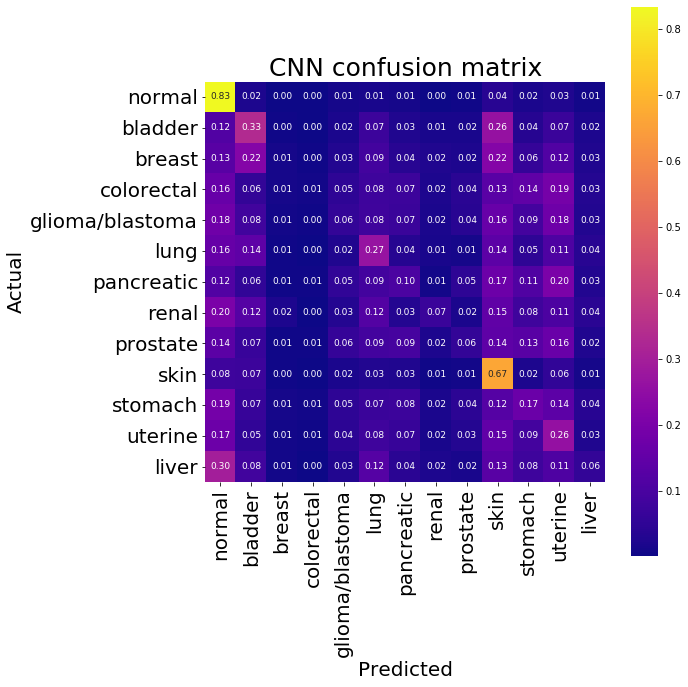

In [477]:
plt.figure(figsize=(10,10))

sns.heatmap(confusion2,square=True,cmap="plasma",annot=True,annot_kws={'size':9},xticklabels=['normal','bladder','breast','colorectal',\
                                               'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver'],
           yticklabels=['normal','bladder','breast','colorectal',\
                                               'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver'],fmt='.2f')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.title('CNN confusion matrix', fontsize=25)
plt.tight_layout()
#plt.savefig('model_liver_plasma.jpg');